# Линейна и логистична регресия

Целите днес:

* Линейна регресия
* Логистична регресия
* Overfitting и underfitting
* Регуляризация

Преди това, нека си припомним неща от миналия път.

## Какво са $X$ и $y$?

$X$ и $y$ са входните данни на нашия machine learning алгоритъм. $X$ е матрица (таблица) от данни, където всеки ред е инстанция на данните, а всяка колона е различна тяхна характеристика. $y$ пък е отговора на въпроса който търсим (labels).

Ако се опитваме да оценим цената на апартаменти в град, всеки ред в $X$ е апартамент (чиято цена знаем), а всяка колона е различна характеристика на апартамента (площ, оценка на квартала, близост до метро, престъпност наоколо и т.н.). $y$ съдържа цените, като първия ред на $X$ съотвества на цената на първия ред от $y$, втория ред на $X$ съответства на втория ред от $y$ и т.н.

## Какво са feature-и (характеристики)?

Набора от характеристики, които знаем за данните. Алгоритмите търсят статистическа зависимост между тях и търсения отговор (напр. връзка между площ и цена).

## Каква е разликата между supervised и unsupervised learning?

При supervised learning имаме данни с label-и (вектора $y$) и търсим зависимости между $X$ и $y$. При unsupervised learning нямаме label-и и се опитваме да намерим генерални характеристики на dataset-а.

## Каква е разликата между регресия и класификация?

Регресията търси отговор в непрекъснато пространство (цена на апартамент), докато класификацията търси отговор, който обикновено е една от две стойности (дали даден имейл е спам или не).

Бележка: класификацията може да работи с няколко категории, като има различни похвати за това (напр. one-vs-all).

Малко код, който ни трябва:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

%matplotlib notebook

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings(action="ignore", module="sklearn", message="^Objective did not")

# Линейна регресия

Линейната регресия е алгоритъм, който се опитва да намери линейна функция (в линейно пространство), която приближава входните данни най-точно. Пространството има толкова измерения, колкото feature-и има в набора от данни.

Например:

w[0]: 0.393906  b: -0.031804


<IPython.core.display.Javascript object>


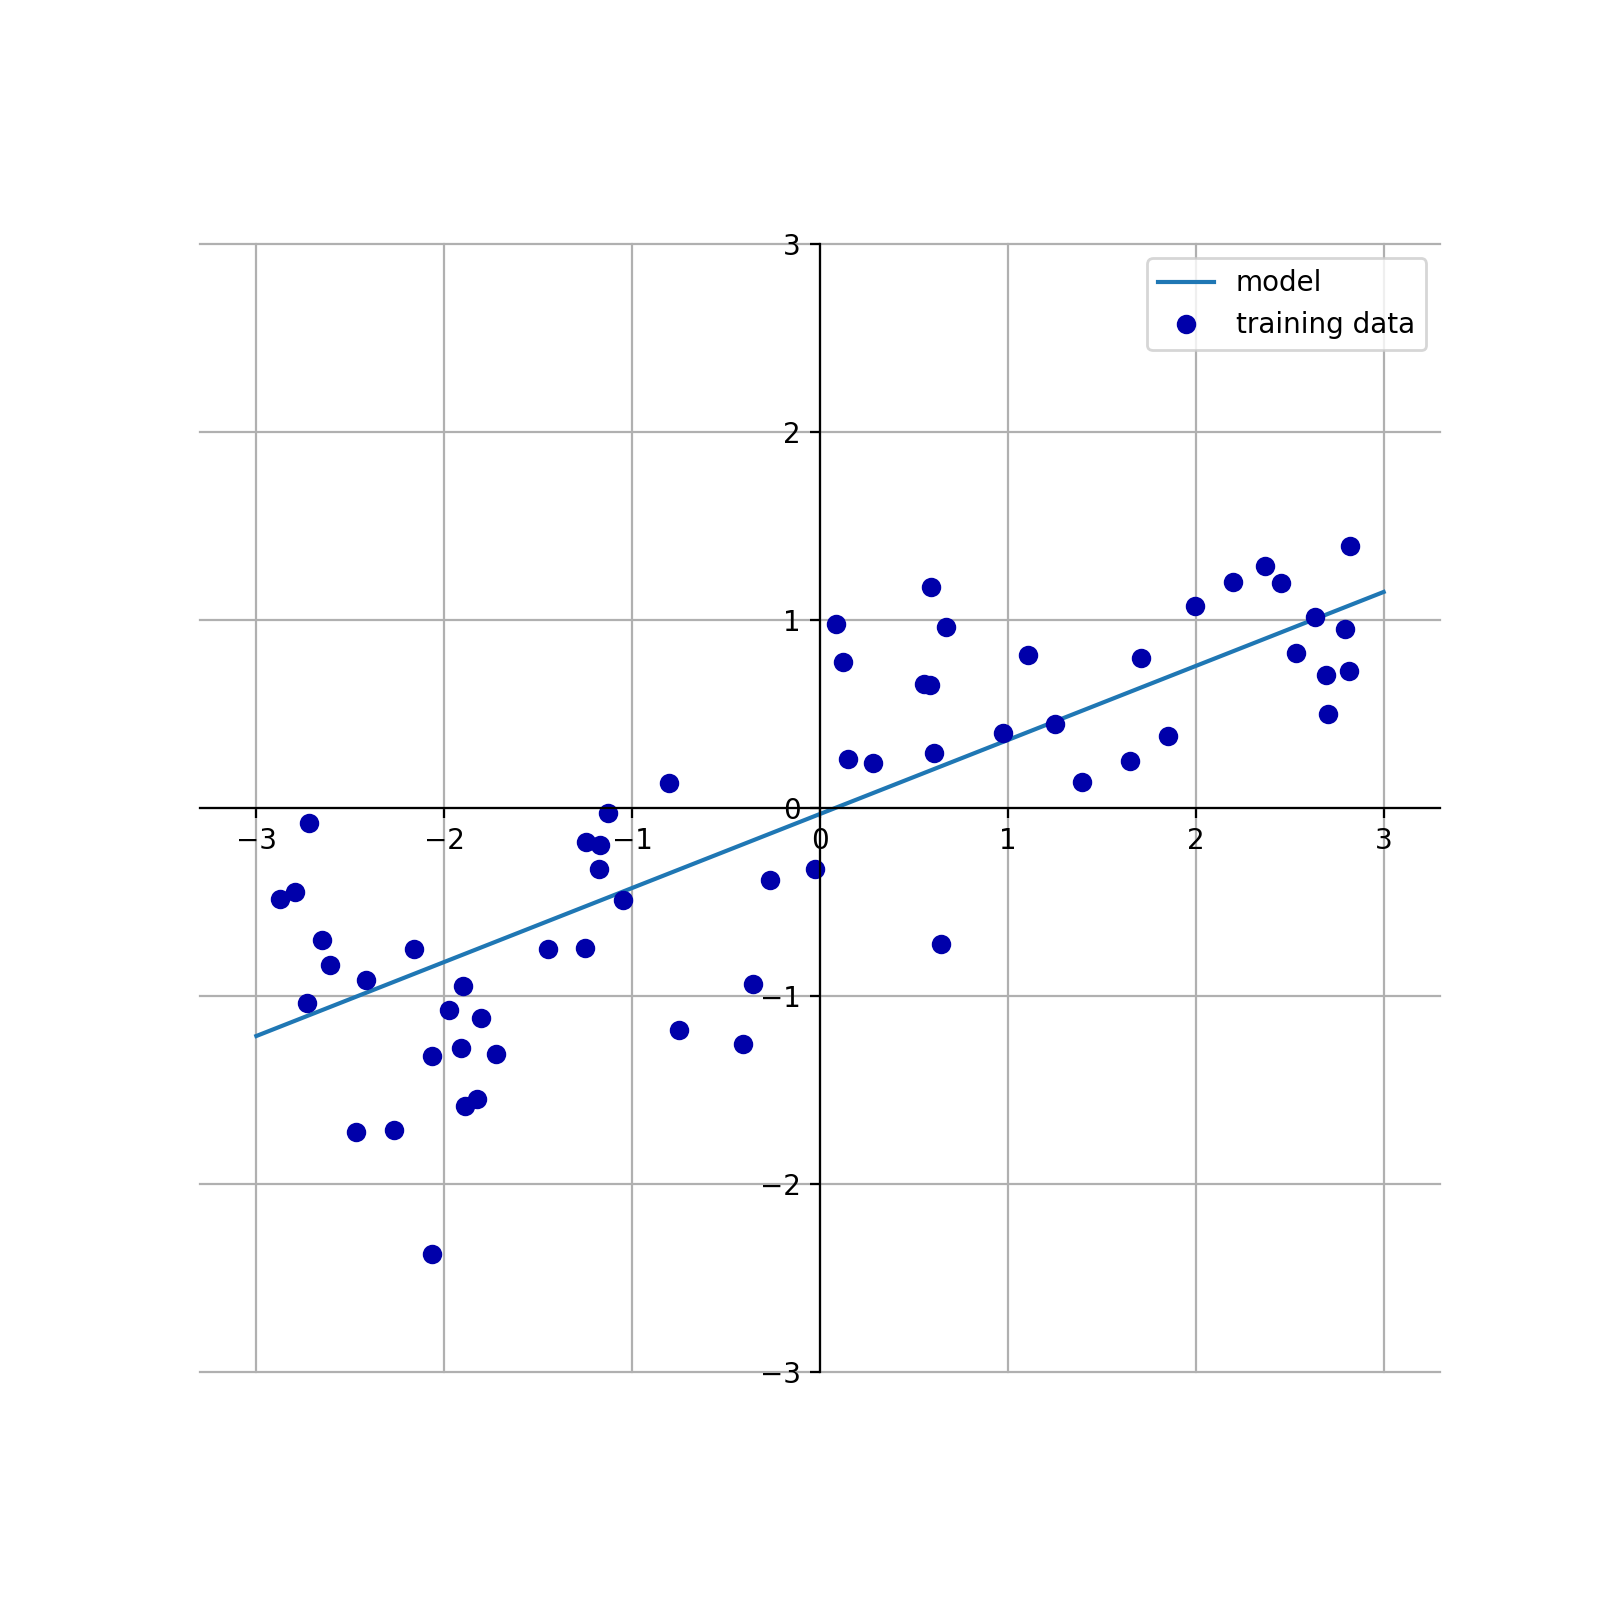

In [2]:
mglearn.plots.plot_linear_regression_wave()

При функция на един аргумент (едномерно линейно пространсто), функцията има вида:

$$y = ax + b$$

И алгоритъма търси $a$ и $b$, които да минимизират общата грешка за елементите от $X$ и $y$

При тримерно пространство, формулата е:

$$y = ax_1 + bx_2 + cx_3 + d$$

Алгоритъма търси $a$, $b$, $c$ и $d$.

Разбира се, това се генерализира за n-мерно пространство:

$$y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$$

Където търсим $a_0 \ldots a_n$.

Обърнете вниманние, че има $a_0$, но няма $x_0$ (или поне, $x_0$ = 1).

Следва малко по-формална дефиниция, която на този етап може да пропуснете. Споменаваме я, защото става въпрос на лекцията.

В горния пример, говорим за грешка $E$, която линейна функция $f$ има спрямо входните данни. Тя може да се дефинира така:

$$ E(a) = \sum_{k=1}^{n} \big( f(x_k) - y_k \big)^2 $$

Където:

* $n$ е броя на измерения (feature-и)
* $a$ и $x_i$ са вектори, $y_i$ и $f(x)$ са реални числа
* $x_i \in \mathbb{R}^n$ е $i$-тия ред от $X$
* $f: \mathbb{R}^n\to\mathbb{R}$ е линейна функция в $n$-мерно пространство
* $a \in \mathbb{R}^{n+1}$ са коефицентите на функцията $f$
* $y_k$ е очакваната стойност на функцията за $k$-тия ред на $X$

Грешката представлява сумата от квадратите на разликата между очакваната (в $y$) и предположената (от $f$) стойност. Алгоритъмът се опитва да намери коефиценти $a$ за които $E(a)$ е минимум. В общия случай това обикновено е глобален минимум, но това са детайли, които ще разгледаме отново по-натам. За повече детайл може да разгледате [курсът на Andrew Ng](https://www.coursera.org/learn/machine-learning).

# Линейна регресия – пример

Нека имаме следния dataset:

In [3]:
linear_data = np.array([
    [0, 1],
    [2, 1.7],
    [8, 3],
    [9, 3.1],
    [10, 3.8]
])

Горното е NumPy масив, който не е в съвсем правилната форма, която търсим. Ще го сведем до нея по следния начин:

In [4]:
X = linear_data[:, 0:1]
y = linear_data[:, 1]

`X` представлява матрица от входни данни.

In [5]:
X

array([[  0.],
       [  2.],
       [  8.],
       [  9.],
       [ 10.]])

`y` пък е вектор от очаквани резултати.

In [6]:
y

array([ 1. ,  1.7,  3. ,  3.1,  3.8])

Макар и математически да няма разлика между вектор и матрица с една колона, NumPy не работи точно така. Може условно да наричаме едномерния масив "вектор", докато двумерния "матрица", дори когато има само една колона.

В Python това се представя като списък от списъци, макар че NumPy го свежда до оптимално представяне, което объркващо нарича "масив". За NumPy ще говорим по-подробно в следващи лекции.

Бихме могли да начертаем точките в графика:

<IPython.core.display.Javascript object>


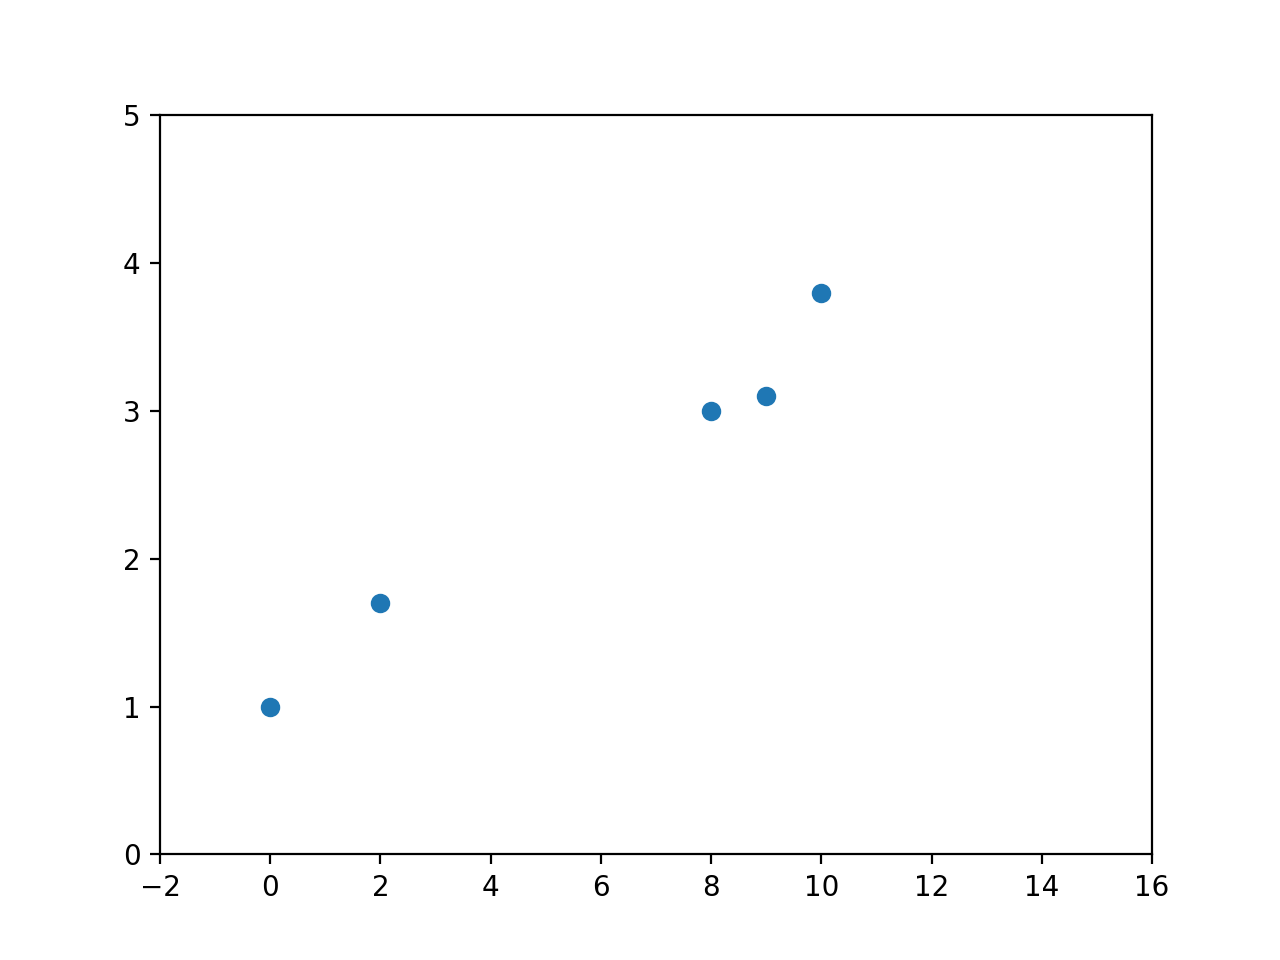

(0, 5)

In [7]:
plt.close()

plt.scatter(X[:, 0], y)
plt.gca().set_xlim(-2, 16)
plt.gca().set_ylim(0, 5)

Тези точки изглеждат горе-долу на една права. На око, нейната функция е $y = 0.25x + 1$.

При $x = 5$ очакваме нещо около $y = (0.25)(5) + 1 = 2.25$:

<IPython.core.display.Javascript object>


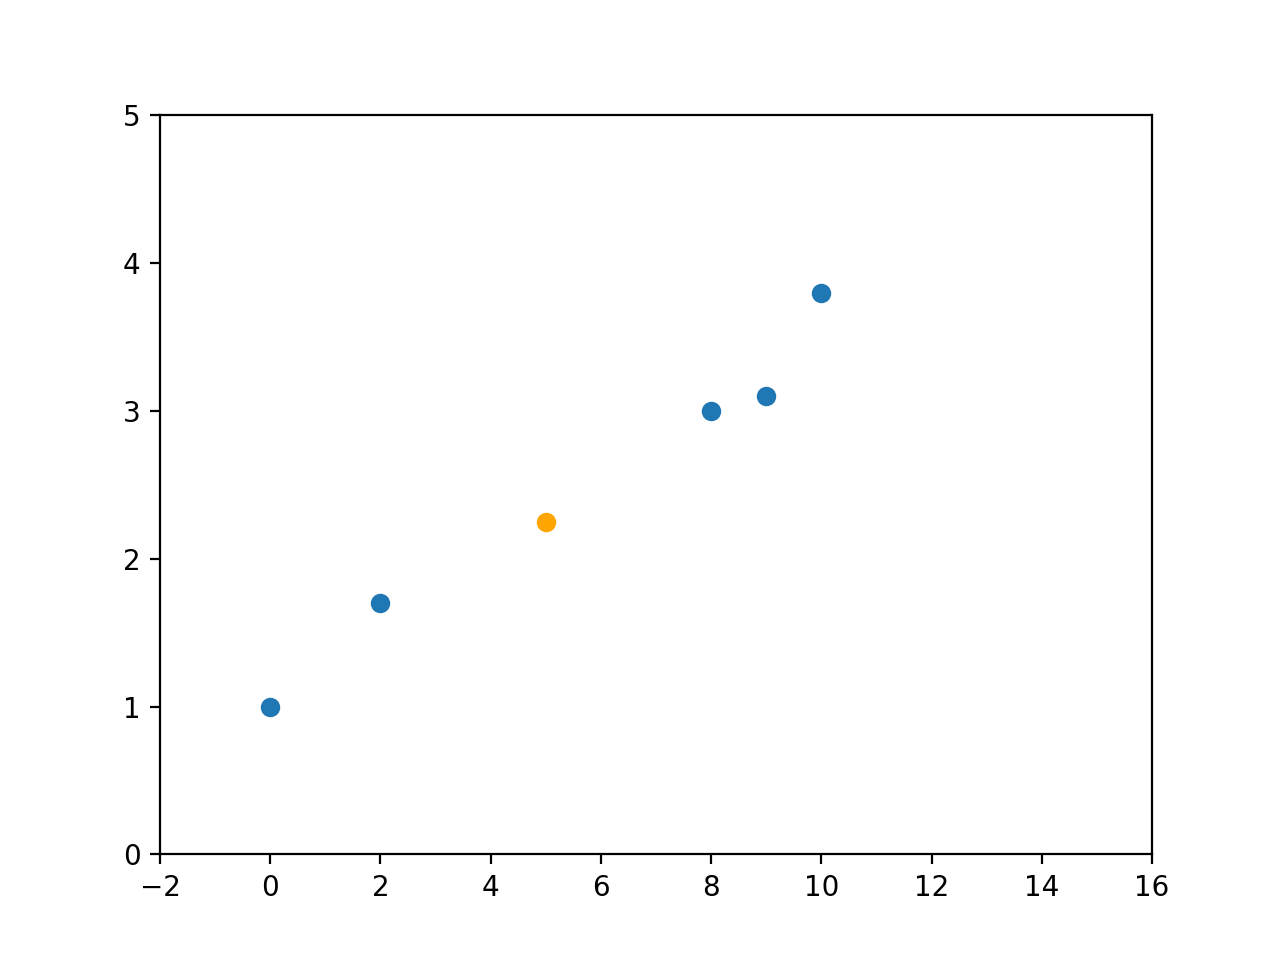

(0, 5)

In [8]:
plt.close()

plt.scatter(X[:, 0], y)
plt.scatter(np.array([5]), np.array([2.25]), color='orange')
plt.gca().set_xlim(-2, 16)
plt.gca().set_ylim(0, 5)

Нека ползваме `scikit-learn` за да намерим линейна функция с минимална грешка спрямо входните данни:

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Това тренира модел (`model`), който открива коефициентите на функция, която търсим:

In [10]:
model.coef_, model.intercept_

(array([ 0.25024752]), 1.0685643564356444)

`coef_` съдържа коефициентите (в случая един), а `intercept_` съдържа константата. Това е достатъчно близко до функцията, която предположихме:

$$y = 0.25x + 1$$

Бихме могли да я начертаем върху точките и да се уверим (на око), че това е така:

<IPython.core.display.Javascript object>


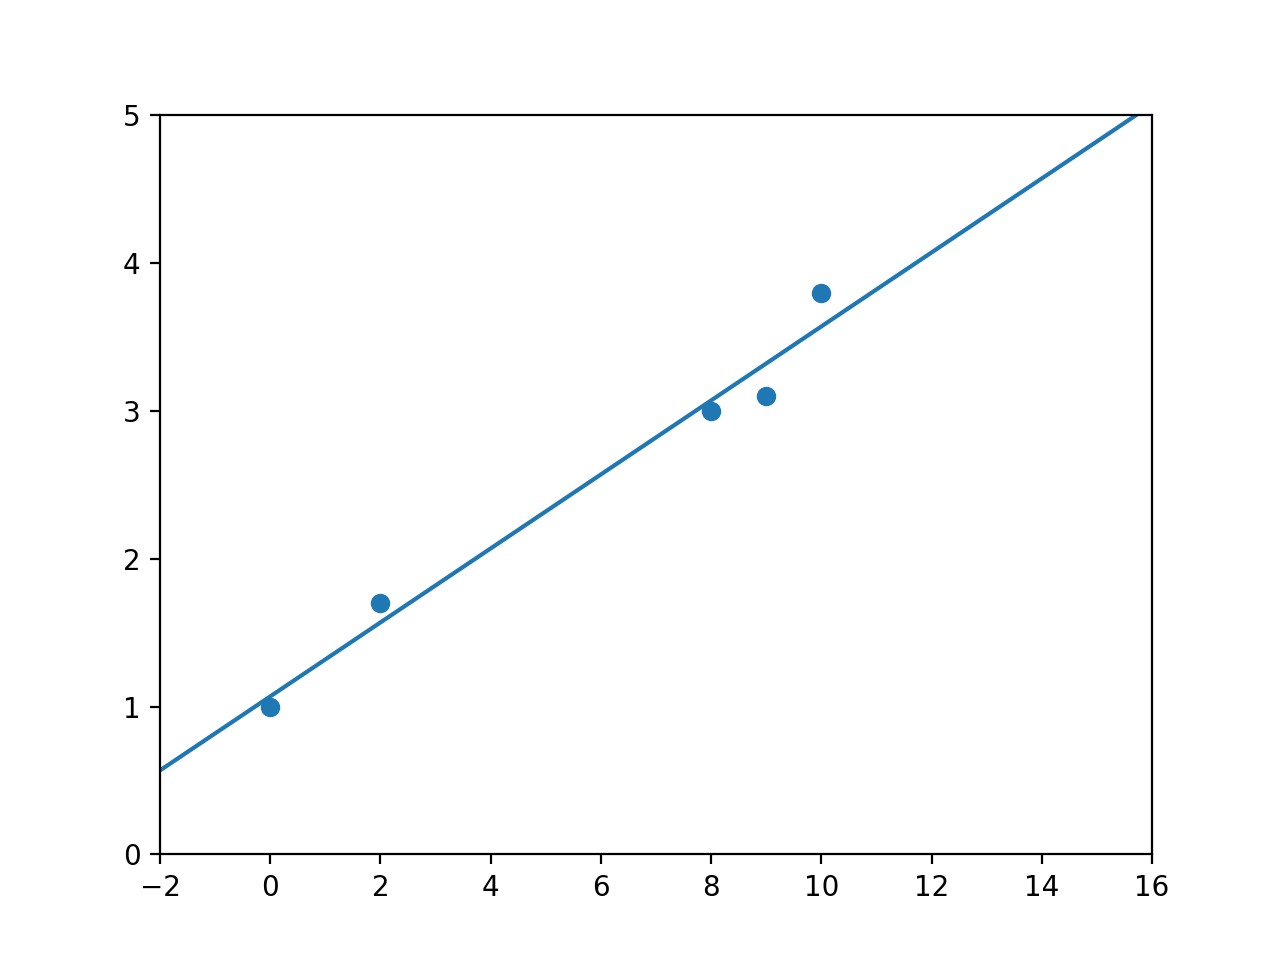

(0, 5)

In [11]:
interval = np.linspace(-2, 16)
result = interval * model.coef_[0] + model.intercept_

plt.close()
plt.scatter(X[:, 0], y)
plt.plot(interval, result)
plt.gca().set_xlim(-2, 16)
plt.gca().set_ylim(0, 5)

Може да направим предвиждане за някоя от точките (например 5):

In [12]:
model.predict(np.array([[5]]))

array([ 2.31980198])

Това е доста близо до очакваната стойност от наивния ни анализ ($2.25$).

Обърнете внимание, че `predict` взема масив от стойности, за които да направи предположение. Бихме могли да направим предвиждане за няколко точки:

In [13]:
model.predict(np.array([[5], [8], [12]]))

array([ 2.31980198,  3.07054455,  4.07153465])

# Генерализация

"Генарализация" наричаме способността на модела да прави вярни предвиждания върху нови данни. Ако един модел се справя добре с това, казваме че генерализира добре.

`scikit-learn` ни дава механизъм да оценим генерализацията:

In [14]:
model.score(X, y)

0.97532863348015619

Резултата от `score` е реално число.

При класификация, тази оценка би била процент от случаите, в които алгоритъма предвижда отговора правилно. Например, ако $X$ бяха имейли, а $y$ е категория дали конкретен имейл е спам, `score = 0` би значело, че винаги даваме грешен отговор, а `score = 1` – винаги правилен.

При регресия е малко по-сложно, защото малки грешки в отговора не са проблем на практика - няма значение дали алгоритъма ще предвици цена на апартамент $200,000лв$ или $200,375лв$. Формулата е по-сложна е не толкова интересна на този етап ([детайли в документацията на scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)). Най-добрият резултат би бил 1, но числото може и да е отрицателно.

# Линейна регресия за нелинейни функции

Бихме могли да предвидим и нелинеен dataset. Например, нека пробваме с експоненциална функция: $2^x$

Имаме следния набор от данни:

<IPython.core.display.Javascript object>


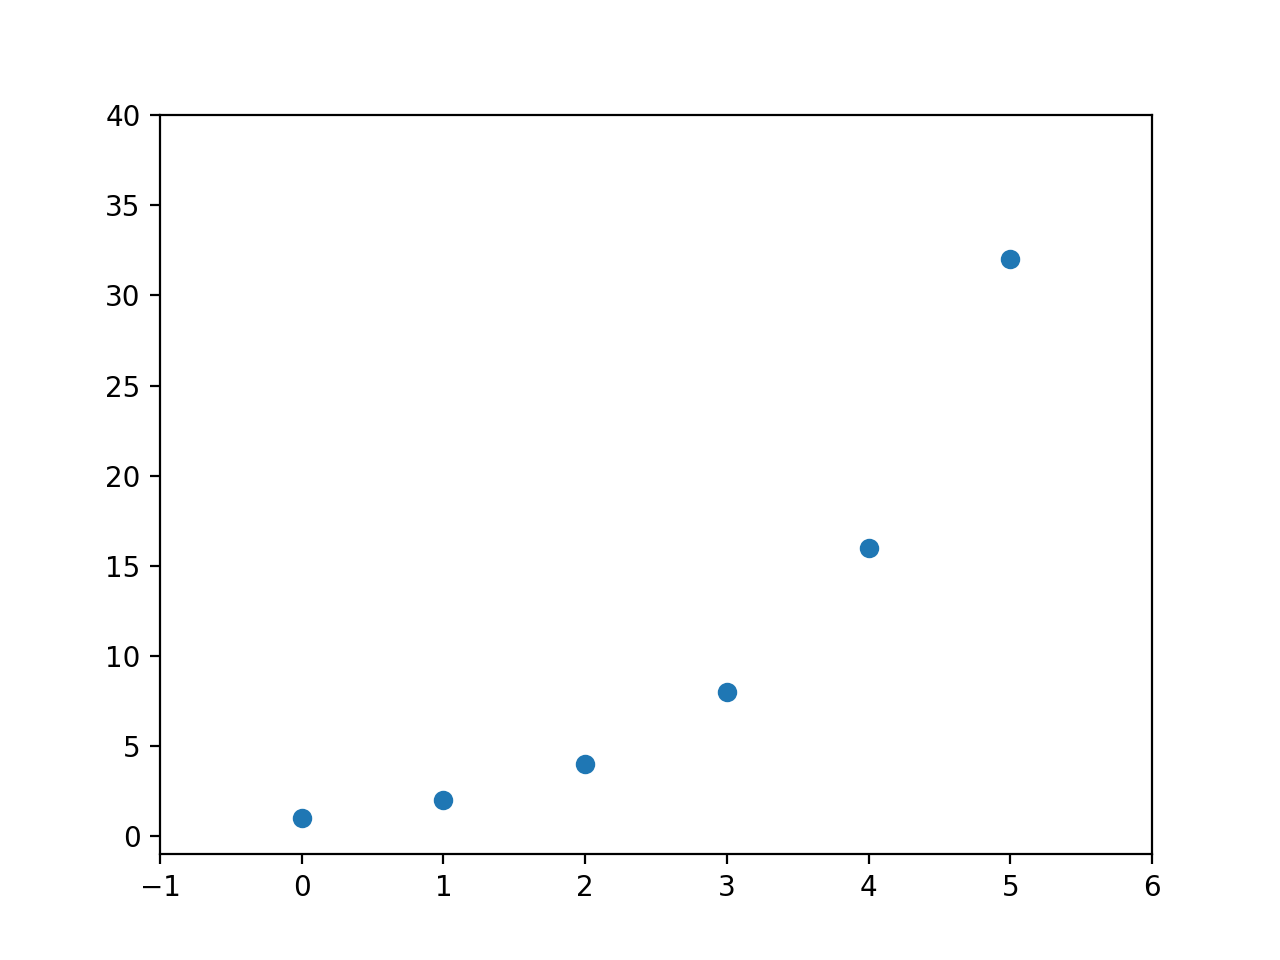

(-1, 40)

In [15]:
exp_data = np.array([[0, 1], [1, 2],  [2, 4], [3, 8], [4, 16], [5, 32]])

X, y = exp_data[:, 0:1], exp_data[:, 1]

plt.close()
plt.scatter(X[:, 0], y)
plt.gca().set_xlim(-1, 6)
plt.gca().set_ylim(-1, 40)

Тази графика не е линейна. Въпреки това, ако обработим входните данни, прекарвайки ги през логаритмична функция, те ще приемат линейна форма:

<IPython.core.display.Javascript object>


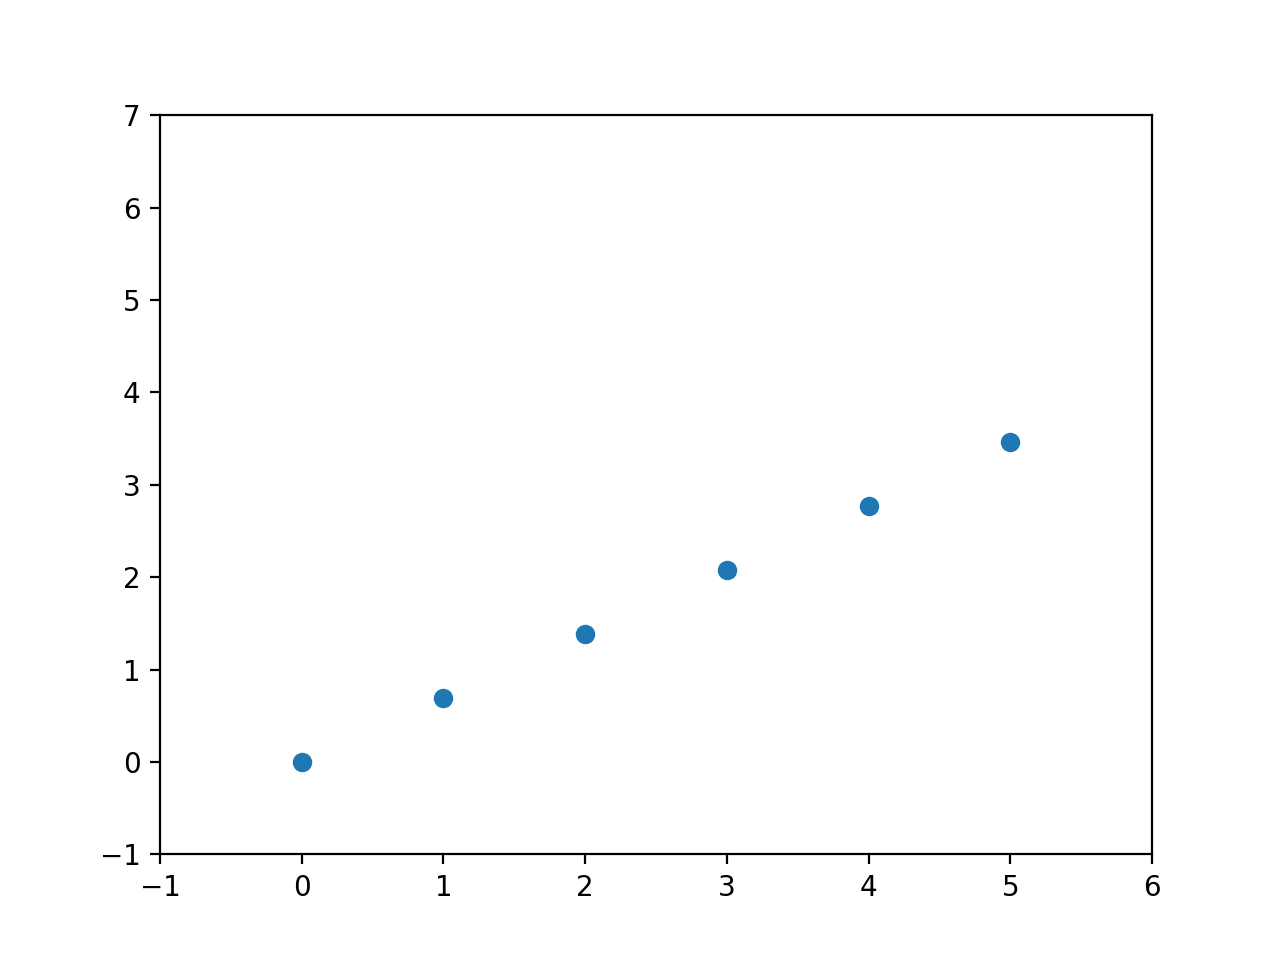

(-1, 7)

In [16]:
y_log = np.log(y)

plt.close()
plt.scatter(X, y_log)
plt.gca().set_xlim(-1, 6)
plt.gca().set_ylim(-1, 7)

Може да използваме линейна регресия върху новите данни, след което да обработим резултата:

In [17]:
model = LinearRegression()
model.fit(X, y_log)

prediction = model.predict(np.array([[8], [16]]))
np.exp(prediction)

array([   256.,  65536.])

Обърнете внимание, че прекарваме резултата от предположението през експоненциална функция (за да обърнем логаритъма).

Ето как ще изглежда тази функция:

<IPython.core.display.Javascript object>


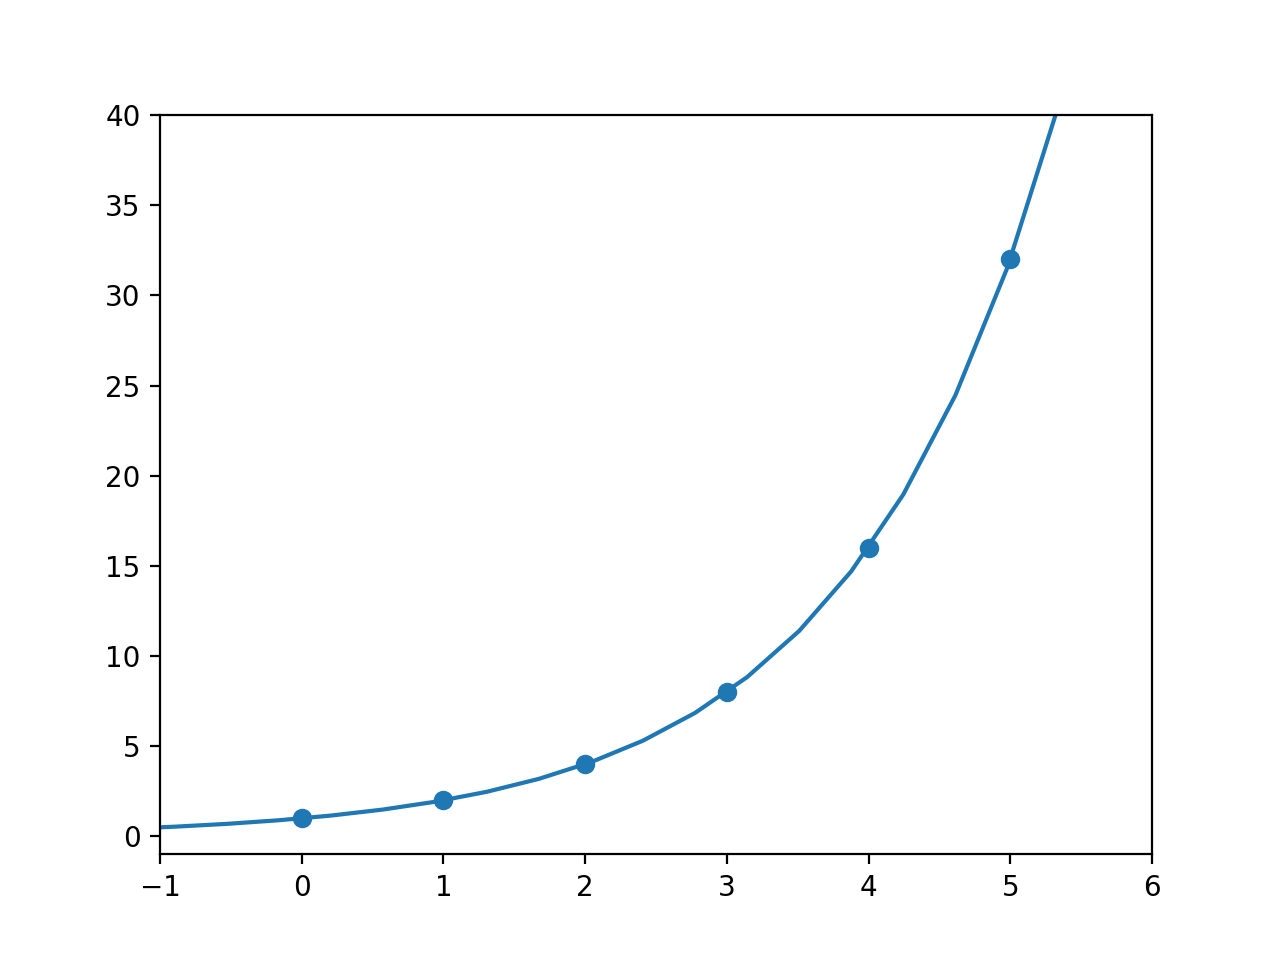

(-1, 40)

In [18]:
interval = np.linspace(-2, 16)
result = np.exp(interval * model.coef_[0] + model.intercept_)

plt.close()
plt.scatter(X[:, 0], y)
plt.plot(interval, result)
plt.gca().set_xlim(-1, 6)
plt.gca().set_ylim(-1, 40)

# Overfitting и underfitting

Тези две концепции се срещат постоянно:

* Underfitting – моделът се справя лошо с тренировъчните данни и генерализира лошо.
* Overfitting – моделът се справя много добре с тренировъчните данни, но генерализира лошо.

За да видим overfitting, нека пробваме да намерим полином от осма степен за оригиналния dataset.

<IPython.core.display.Javascript object>


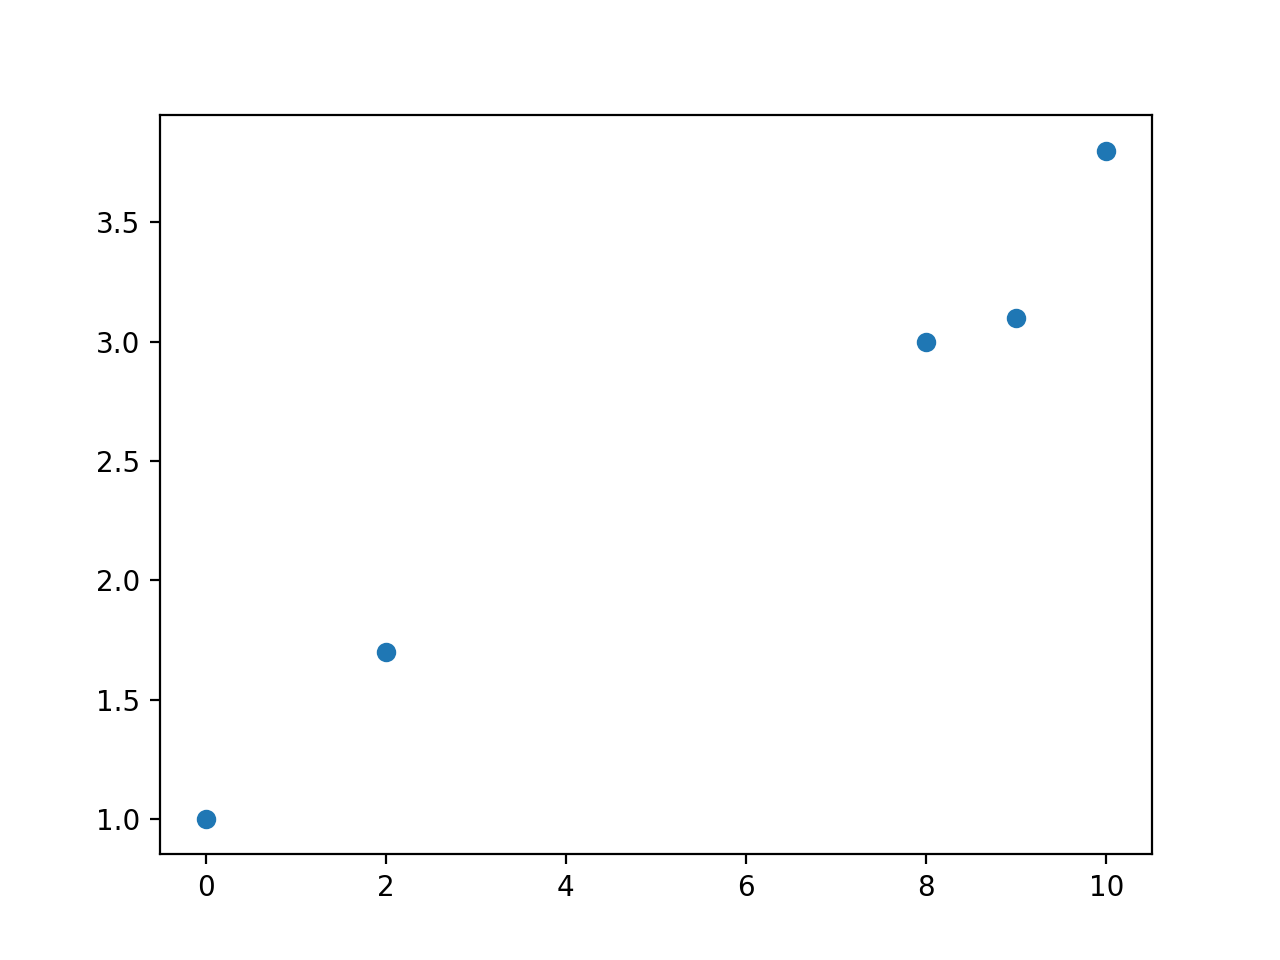

In [19]:
linear_data = np.array([[0, 1], [2, 1.7], [8, 3], [9, 3.1], [10, 3.8]])
X, y = linear_data[:, 0:1], linear_data[:, 1]

plt.close()
plt.scatter(X[:, 0], y)

Първо ще обработим оригиналните данни, създавайки нови feature и – $x^2$, $x^3, \ldots, x^8$. Така входните данни ще бъдат вектори с 8 елемента, като всеки feature съответства на степен на оригиналната стойност.

In [20]:
X_poly = np.concatenate((X, X ** 2, X ** 3, X ** 4, X ** 5, X ** 6, X ** 7, X ** 8), axis=1)
X_poly

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  2.00000000e+00,   4.00000000e+00,   8.00000000e+00,
          1.60000000e+01,   3.20000000e+01,   6.40000000e+01,
          1.28000000e+02,   2.56000000e+02],
       [  8.00000000e+00,   6.40000000e+01,   5.12000000e+02,
          4.09600000e+03,   3.27680000e+04,   2.62144000e+05,
          2.09715200e+06,   1.67772160e+07],
       [  9.00000000e+00,   8.10000000e+01,   7.29000000e+02,
          6.56100000e+03,   5.90490000e+04,   5.31441000e+05,
          4.78296900e+06,   4.30467210e+07],
       [  1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
          1.00000000e+04,   1.00000000e+05,   1.00000000e+06,
          1.00000000e+07,   1.00000000e+08]])

Нека да пробваме да тренираме модел:

In [21]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Този модел има следните коефициенти:

In [22]:
[model.intercept_, model.coef_]

[1.0000000000045661,
 array([  3.28311028e-03,   6.43300826e-03,   1.20812072e-02,
          2.00031944e-02,   2.17184447e-02,  -8.86906561e-03,
          1.04515266e-03,  -3.96429474e-05])]

Ако начертаем полинома с тези компоненти, получаваме следното:

<IPython.core.display.Javascript object>


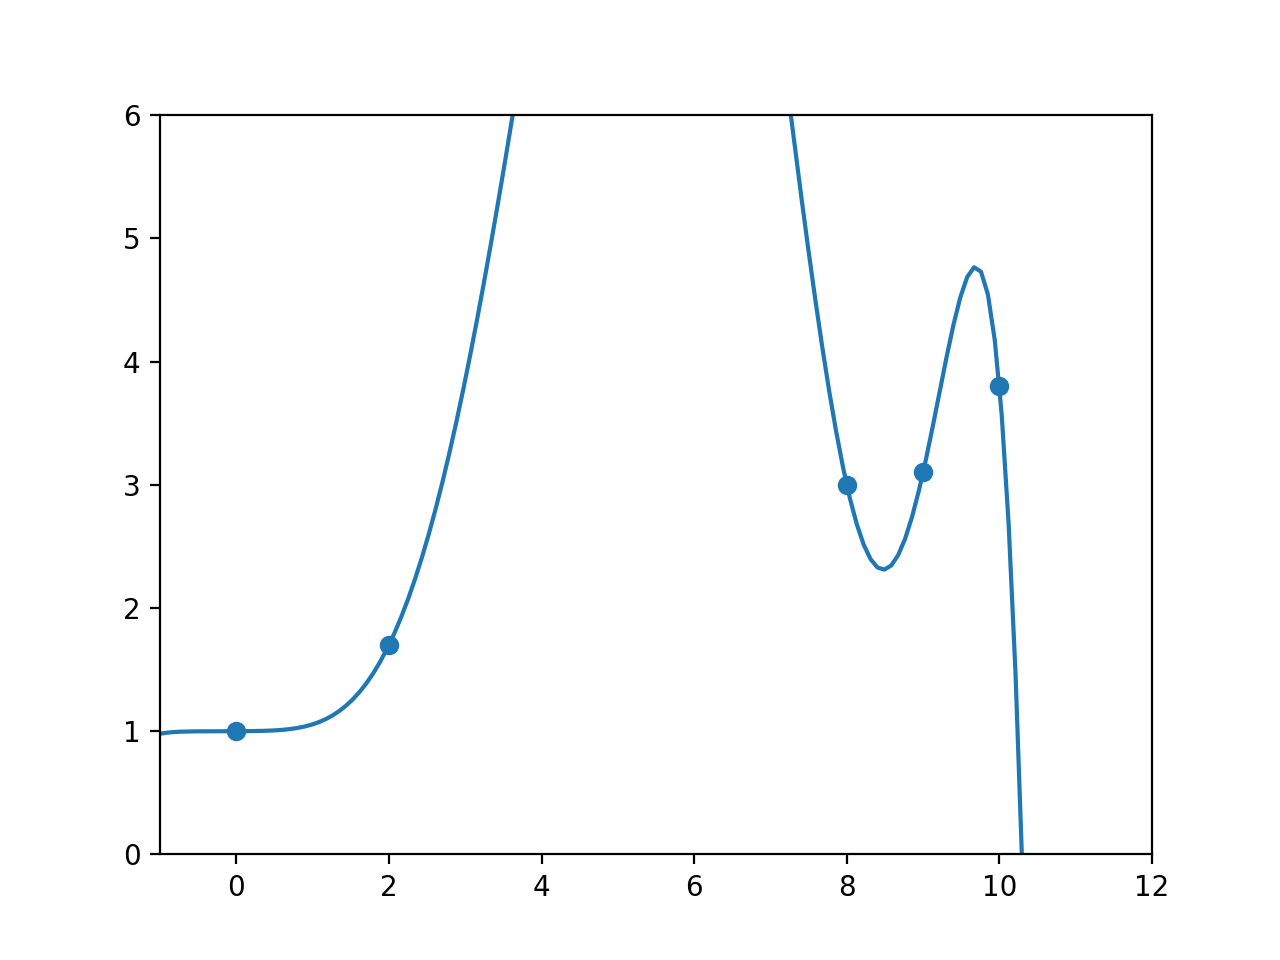

(0, 6)

In [23]:
interval = np.linspace(-2, 16, num=200)

@np.vectorize
def polynomial(x):
    return sum(a * x**(b+1) for (b, a) in enumerate(model.coef_)) + model.intercept_

plt.close()
plt.scatter(X[:, 0], y)
plt.plot(interval, polynomial(interval))
plt.gca().set_xlim(-1, 12); plt.gca().set_ylim(0, 6)

Тук виждаме overfitting – намира се много по-сложен модел, който уцелва всички точки от dataset-а, но генерализира лошо.

Това е интуитивно – бихме могли да прокараме полином от осма степен през 9 произволни точки (камо ли пет). За сметка на това не, можем да намерим линейна функция за 5 точки точки (освен в частния случай, когато лежат на една права). Алгоритъмът намира функция без грежка на входнити данни, но генерализира зле – $f(5)$ вече е стойност, съвсем различна от $2.25$. Допълнително, поведението извън интервала е $(0, 10)$ се разминава сериозно очакваното.

In [24]:
(polynomial(5), polynomial(20))

(array(10.647402988512166), array(-171884.42548119556))

Един от проблемите тук, е че имаме много малък dataset. При повече данни щяхме да имаме по-малък overfitting.

# Регуляризация

Повече модели прилагат някаква форма на регуляризация. Концепцията изисква повече математика за обяснение, но накратко, регуляризацията принуждава модела да бъде по-прост. Какво значи това зависи от конкретния алгоритъм.

В случая на линейната регресия, регуляризацията алгоритъма да минимизира коефициентите в линейното уравнение. Ниски коефициенти резултират в по-прост линеен модел.

Ще видим два вида регуляризация от `scikit-learn` – [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge) и [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso)

In [25]:
# Тази функция е написана отделно за да се спести място в слайдовете. Ще се ползва по-долу
def draw_regularization(algorithm, alpha=1):
    model = algorithm(alpha=alpha, max_iter=100000)
    model.fit(X_poly, y)
    
    interval = np.linspace(-2, 16, num=200)

    @np.vectorize
    def polynomial(x):
        return sum(a * x**(b+1) for (b, a) in enumerate(model.coef_)) + model.intercept_

    plt.close()
    plt.scatter(X[:, 0], y)
    plt.plot(interval, polynomial(interval))
    plt.gca().set_xlim(-1, 12); plt.gca().set_ylim(0, 6)

# Ridge

`Ridge` използва нещо, наречено L2 регуляризация. Детайлите са по-сложни математически и ще ги покрием по-натам. Ефектът, е че графиката е "по-изгладена".

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

<IPython.core.display.Javascript object>


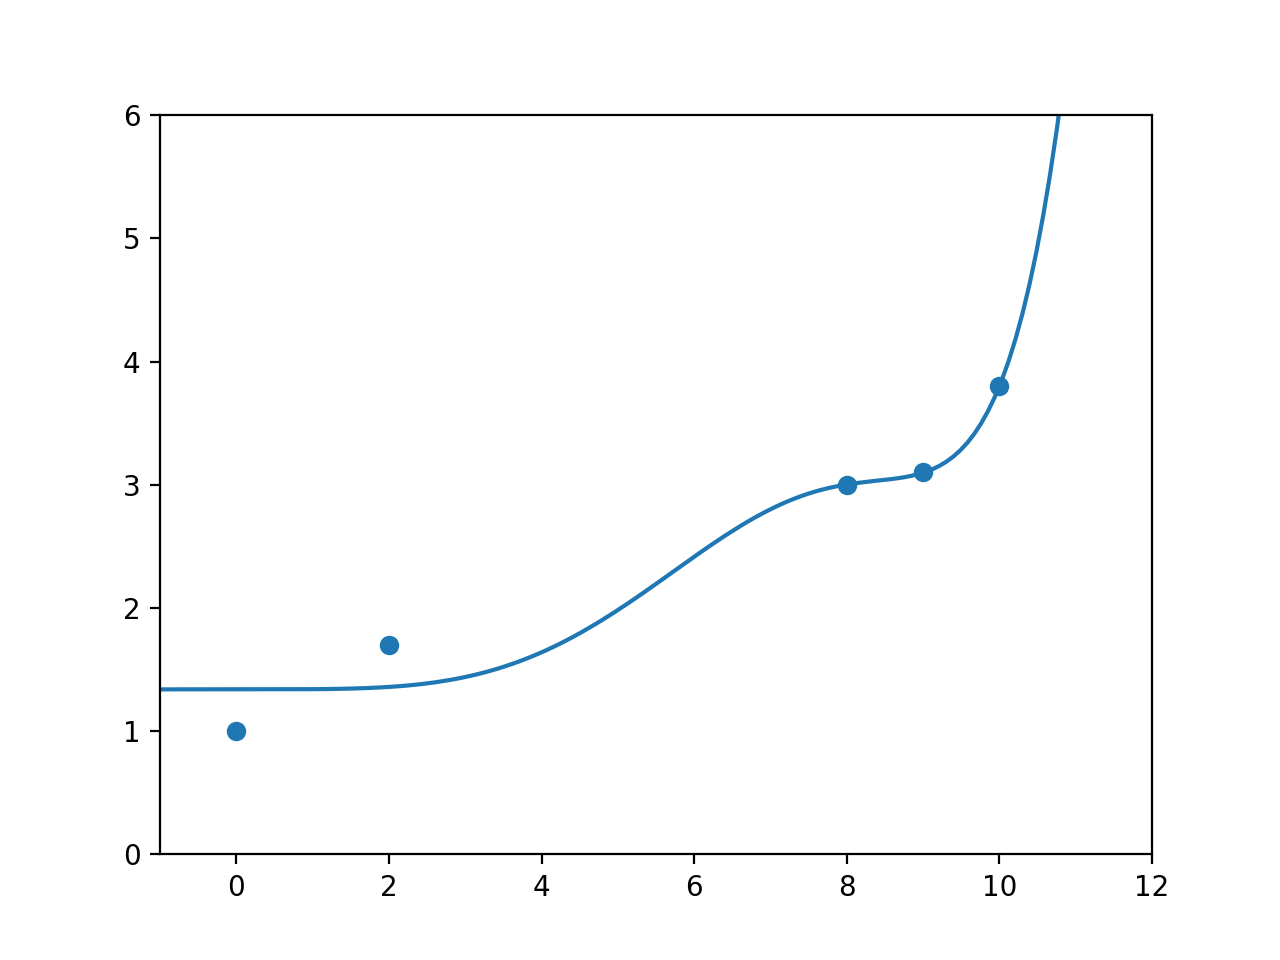

In [27]:
draw_regularization(Ridge, alpha=10000)

In [28]:
regression = LinearRegression()
regression.fit(X_poly, y)

ridge = Ridge(alpha=10000)
ridge.fit(X_poly, y)

[regression.coef_, ridge.coef_]

[array([  3.28311028e-03,   6.43300826e-03,   1.20812072e-02,
          2.00031944e-02,   2.17184447e-02,  -8.86906561e-03,
          1.04515266e-03,  -3.96429474e-05]),
 array([  6.75649708e-05,   1.32551327e-04,   2.49881503e-04,
          4.18831512e-04,   4.79428411e-04,  -8.72849163e-05,
          1.70478465e-06,   2.03027144e-07])]

Може да пробваме и с `Lasso`:

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10000)
lasso.fit(X_poly, y)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

<IPython.core.display.Javascript object>


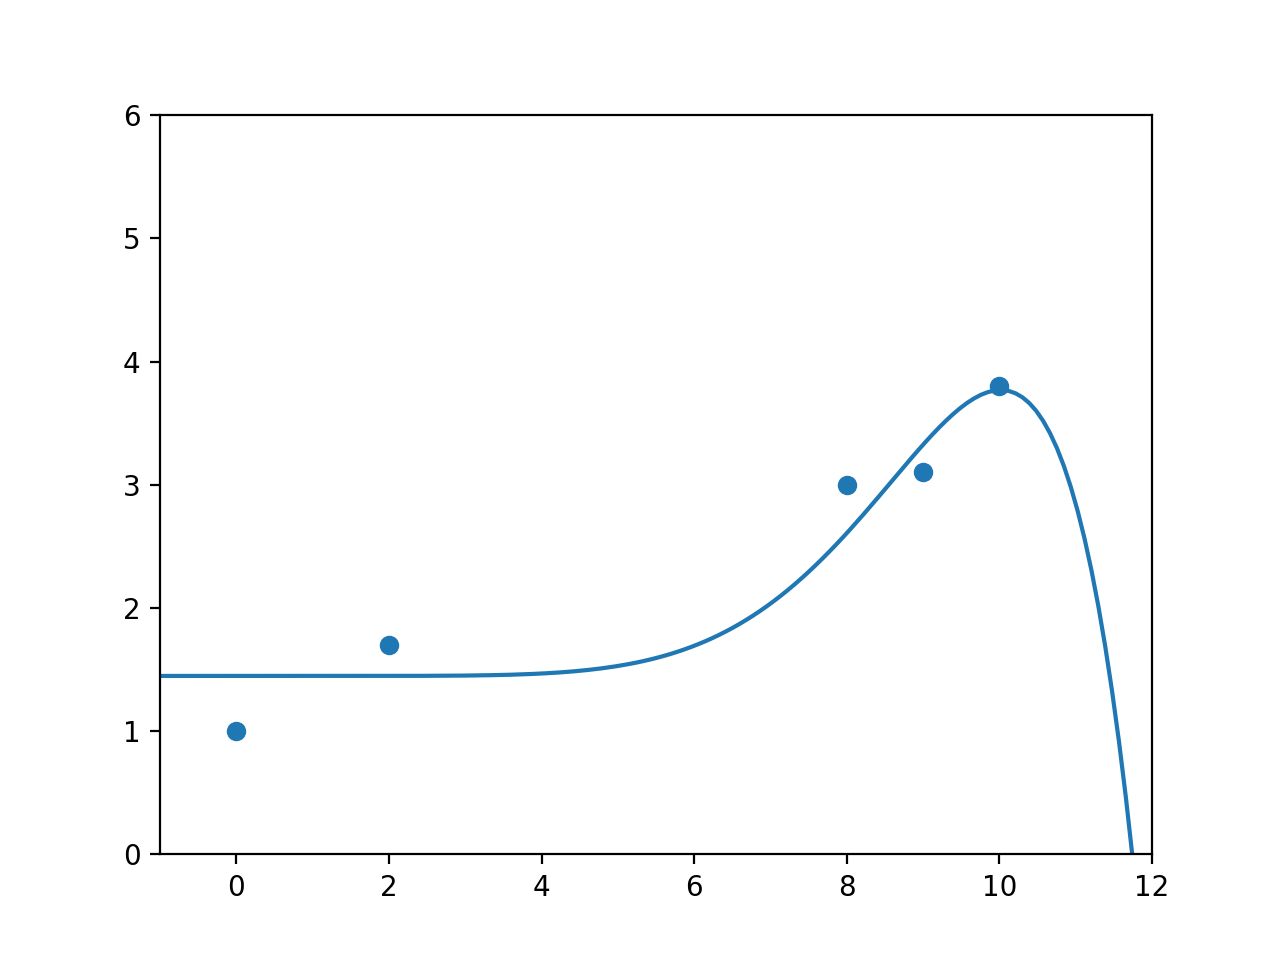

In [30]:
draw_regularization(Lasso, alpha=10000)

`Lasso` ползва L1 регуляризация. Разликата отново е математическа (и детайлите са нерелавнтни за момента), но `Lasso` може да намали някои коефициенти до 0, за разлика от `Ridge`. Така биха елиминирани feature-и, които не носят информация.

# Train & test sets

Обикновено разделяме dataset-а на две части – training и test. Използваме training set-а да тренираме модела и test set-а да оценим как генерализира. Ако и двете числа са ниски, това е симптом за underfitting. Ако оценката на тренировъчния е висока, но тази на тестовия е ниска, обикновено има overfitting.

`scikit-learn` предоставя функция за разделяне на dataset-а.

Нека пробваме с един синтетичен dataset:

In [31]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.67
Test score:     0.66


$0.66$ е ниско (около 66% вярно) - вероятно този модел underfit-ва.

Да пробваме с апартаментите:

In [32]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LinearRegression().fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.95
Test score:     0.61


Тук вече има overfitting. Това лесно може да се случи при многомерни пространства.

Може да пробваме да решим този проблем с регуляризация:

In [33]:
model = Ridge(alpha=1).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.89
Test score:     0.75


Променяйки `alpha` параметъра получаваме различни резултати:

In [34]:
model = Ridge(alpha=10).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.79
Test score:     0.64


Резултатът тук се влошава – вероятно регуляризацията е твърде голяма. Може да пробваме да я намалим.

In [35]:
model = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.93
Test score:     0.77


Тук имаме малко по-добър резултат.

Нека пробваме с `Lasso`:

In [36]:
model = Lasso(alpha=1).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))
print("Features used:  {}/{}".format(np.sum(model.coef_ != 0), np.shape(X_train)[1]))

Training score: 0.29
Test score:     0.21
Features used:  4/104


Резултатът е много по-лош, но виждаме, че само 4 feature-а се ползват. Алгоритъмът смята другите за неинформативни.

Бихме могли да подобрим резултата като намалим регуляризацията:

In [37]:
model = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))
print("Features used:  {}/{}".format(np.sum(model.coef_ != 0), np.shape(X_train)[1]))

Training score: 0.90
Test score:     0.77
Features used:  33/104


Ако продължим да я намаляваме, обаче, ще стигнем до overfitting.

In [38]:
model = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))
print("Features used:  {}/{}".format(np.sum(model.coef_ != 0), np.shape(X_train)[1]))

Training score: 0.95
Test score:     0.64
Features used:  94/104


# Логистична регресия

Въпреки името, това е алгоритъм за класификация. Същото е като линейна регресия, единствената разлика е, че резултата се прекарва през сигмоид (sigmoid).

Сигмоида е тази функция:

$$f(x) = \frac{1}{1 + e^{-x}}$$

<IPython.core.display.Javascript object>


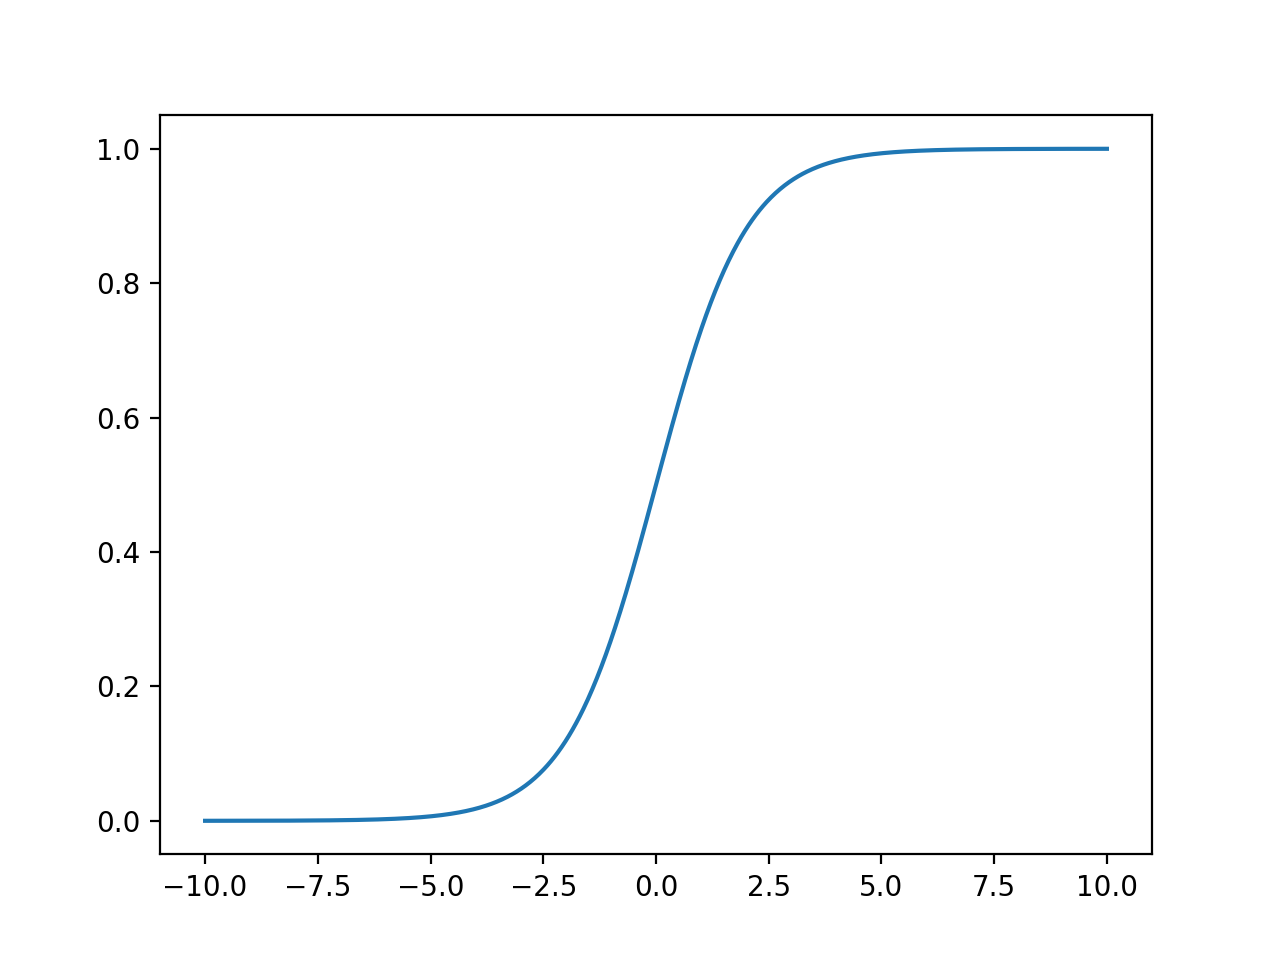

In [39]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

interval = np.linspace(-10, 10, num=1000)

plt.close()
plt.plot(interval, sigmoid(interval))

Тази функция е 0.5 в нулата и клони към 1 за $+\infty$ и към 0 за $-\infty$.

Може да ползваме двете граници за два отделни класа при класификация. Например, ако предвиждаме дали даден имейл е спам, 0 може да значи "не" и 1 може да значи "да".

Може да я ползваме да класифицираме любимия на всички dataset:

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

regression = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(regression.score(X_train, y_train)))
print("Test set score:     {:.3f}".format(regression.score(X_test, y_test)))

Training set score: 0.953
Test set score:     0.958


С регуляризация може да постигнем и по-добри резултати:

In [41]:
regression = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(regression.score(X_train, y_train)))
print("Test set score:     {:.3f}".format(regression.score(X_test, y_test)))

Training set score: 0.974
Test set score:     0.965


Няма нищо сложно и магическо в логистичната регресия – единствената разлика е, че линейната функция минава през сигмоид.

Малка статистическа бележка:

Горния алгоритъм дава верен отговор в 95% от ситуациите. Това е информативно, когато двата класа са приблизително равномерно представени. Но ако единия е малък процент от другия, имаме проблем.

Нека да си представим алгоритъм, който предвижда дали даден човек има рядко заболяване, налично в само 1% от хората. Ако 99% от dataset-а са хора без заболяването и 1% го има, тогава е много лесно да направим алгоритъм с 99% точност, като винаги отговаряме с "не". В такива случаи е важно да вземем предвид по-редкия случай и да го разгледаме отделно – по-важен въпрос е колко хора със заболяване биват правилно идентифицирани. Може да има и значение, ако различният вид грешка има различна цена – неправилно класифициран "болен" може да резултира в излишни (но безобидни) изследвания, но неправилно класифициран "здрав" рискува да пропусне лечение.

Има малко математика, коияо може да са ни е полезна в такива случаи, но ще я разгледаме по-натам.

# Въпроси

* http://fmi.machine-learning.bg
* fmi@machine-learning.bg